# Executive Summary

## About the dataset

    * IMDB movie review dataset was used in this project.
    * There are 25.000 training review and the same quantity of the test data.
    * The ready word index was used in this project. 

## Preprocessing the dataset

    * Convert the words to numeric thanks to word index by defining a function.
    * Added some html codes in this index.
    * Split the data train and test.
    
## Build the Model

     * Sequential API was used.
     * Embedding Layer, after that Global Average Pooling, one hidden layer, two Dropout and Output Layer.
     * ReLu activation function was used in the hidden layer and Sigmoid activation function in the output layer.
     * Adam optimizer function and Binary crossentropy for loss and accuracy metrics was used in the model. 
    
## Evaluate the Model
     * After training this model, my model had overfitting. 
     * To overcome this problem, I added Dropout layer aafter the Global Average Pool Layer with 0.2 percentage. 
     * After added this layers, overfitting was still going on. 
     * So, I added another Dropout Layer after the hidden layer. 
     * When restart the analysis, I achieved reliable and acceptable results.
     * My model accuracy is .92 and validation score is .88. 
     * I also visualize the train and test loss and accuracy. 
     * Train dataset accuracy and test dataset do not differentiate significantly each other.
     * So it can be said that over-fitting cannot be seen. 
     * All in all, I can say that my model is reliable model to determine the movie review.


# Import the Libraries

In [21]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt

# Import the Dataset

In [2]:
imdb_reviews = pd.read_csv('imdb_reviews.csv')
test_reviews = pd.read_csv('test_reviews.csv')

In [3]:
imdb_reviews.head()

,Reviews,Sentiment
0,<START this film was just brilliant casting lo...,positive
1,<START big hair big boobs bad music and a gian...,negative
2,<START this has to be one of the worst films o...,negative
3,<START the <UNK> <UNK> at storytelling the tra...,positive
4,<START worst mistake of my life br br i picked...,negative


In [45]:
imdb_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Reviews    25000 non-null  object
 1   Sentiment  25000 non-null  object
dtypes: object(2)
memory usage: 390.8+ KB


In [46]:
test_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Reviews    25000 non-null  object
 1   Sentiment  25000 non-null  object
dtypes: object(2)
memory usage: 390.8+ KB


# Import the Word Index File

This file was used in this project for converting words to the numbers

In [4]:
word_index = pd.read_csv('word_indexes.csv')

In [5]:
word_index.head()

,Words,Indexes
0,tsukino,52009
1,nunnery,52010
2,sonja,16819
3,vani,63954
4,woods,1411


## Convert the word index to dictionary

In [6]:
word_index = dict(zip(word_index.Words, word_index.Indexes))

## Add some words in the Word index

In [7]:
word_index["<PAD>"] = 0
word_index["<START"]=1
word_index["<UNK>"] = 2
word_index["<UNUSED>"]=3

## Function for converting the words to the numbers which was identified in the Word Index file

In [8]:
def review_encoder(text):
    arr = [word_index[word] for word in text]
    return arr

In [9]:
train_data, train_labels=imdb_reviews['Reviews'], imdb_reviews['Sentiment']
test_data, test_labels=test_reviews['Reviews'], test_reviews['Sentiment']

In [10]:
train_data.head()

0    <START this film was just brilliant casting lo...
1    <START big hair big boobs bad music and a gian...
2    <START this has to be one of the worst films o...
3    <START the <UNK> <UNK> at storytelling the tra...
4    <START worst mistake of my life br br i picked...
Name: Reviews, dtype: object

## Split the sentences into the words

In [11]:
train_data = train_data.apply(lambda review:review.split())
test_data = test_data.apply(lambda review:review.split())

## Convert words in the train data to the numbers

In [12]:
train_data = train_data.apply(review_encoder)
test_data = test_data.apply(review_encoder)

In [83]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

## Transform the Sentiment column to the numeric

In [13]:
def encode_sentiments(sentiment):
    if(sentiment == 'positive'):
        return 1
    else:
        return 0

In [14]:
train_labels = train_labels.apply(encode_sentiments)
test_labels = test_labels.apply(encode_sentiments)

In [15]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data, value=word_index["<PAD>"], padding='post', maxlen = 500)
test_data = keras.preprocessing.sequence.pad_sequences(test_data, value=word_index["<PAD>"], padding='post', maxlen = 500)

# Build the Model

I used Sequential Function, firstly I used Embedding Layer, after that Global Average Pooling, one hidden layer, two Dropout and Output Layer. I used ReLu activation function in the hidden layer and Sigmoid activation function in the output layer. I also used Adam optimizer function and Binary crossentropy for loss and accuracy metrics. After training this model, my model had overfitting. To overcome this problem, I added Dropout layer aafter the Global Average Pool Layer with 0.2 percentage. After added this layers, overfitting was still going on. So, I added another Dropout Layer after the hidden layer. When restart the analysis, I achieved reliable and acceptable results.

In [39]:
model = keras.Sequential([keras.layers.Embedding(10000,16, input_length=500),
                        keras.layers.GlobalAveragePooling1D(),
                        keras.layers.Dropout(0.2),
                        keras.layers.Dense(16, activation='relu'),
                        keras.layers.Dropout(0.4),
                        keras.layers.Dense(1,activation='sigmoid')])

In [40]:
model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [41]:
history_model = model.fit(train_data,train_labels,epochs = 20, batch_size=512, validation_data= [test_data,test_labels] )

Epoch 1/20
49/49 [==============================] - 3s 44ms/step - loss: 0.6923 - accuracy: 0.5275 - val_loss: 0.6907 - val_accuracy: 0.6595
Epoch 2/20
49/49 [==============================] - 2s 40ms/step - loss: 0.6870 - accuracy: 0.6081 - val_loss: 0.6821 - val_accuracy: 0.7262
Epoch 3/20
49/49 [==============================] - 2s 40ms/step - loss: 0.6718 - accuracy: 0.6782 - val_loss: 0.6604 - val_accuracy: 0.7405
Epoch 4/20
49/49 [==============================] - 2s 42ms/step - loss: 0.6413 - accuracy: 0.7284 - val_loss: 0.6220 - val_accuracy: 0.7849
Epoch 5/20
49/49 [==============================] - 2s 42ms/step - loss: 0.5944 - accuracy: 0.7627 - val_loss: 0.5704 - val_accuracy: 0.8048
Epoch 6/20
49/49 [==============================] - 2s 40ms/step - loss: 0.5411 - accuracy: 0.7888 - val_loss: 0.5171 - val_accuracy: 0.8296
Epoch 7/20
49/49 [==============================] - 2s 41ms/step - loss: 0.4875 - accuracy: 0.8202 - val_loss: 0.4669 - val_accuracy: 0.8386
Epoch 8/20
49

In [42]:
history_dict = history_model.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

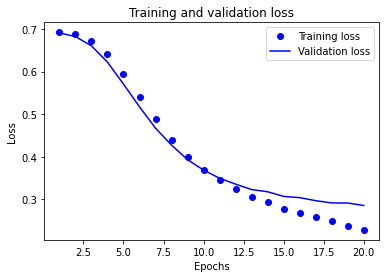

In [43]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

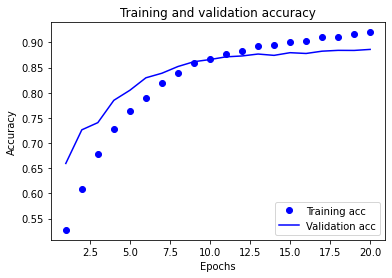

In [44]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

# Interpretation of the training results

My model accuracy is .92 and validation score is .88. I also visualize the train and test loss and accuracy. During the analysis, over-fitting cannot be seen. In other words, train dataset accuracy and test dataset do not differentiate significantly each other. All in all, I can say that my model is reliable model to determine the movie review.